<a href="https://colab.research.google.com/github/sronak/Data_Science/blob/main/Day36_Regression_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("insurance.csv")

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
hp = sorted(df['charges'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1)) 
upper_bound = q3 + (1.5 * (q3-q1))
below = df['charges'] > lower_bound
above = df['charges'] < upper_bound
df = df[below & above]

In [7]:
df
df.shape

(1199, 7)

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.sex.value_counts()

female    612
male      587
Name: sex, dtype: int64

In [10]:
df.smoker.value_counts()

no     1061
yes     138
Name: smoker, dtype: int64

In [11]:
df.region.value_counts()

southeast    307
northwest    305
northeast    296
southwest    291
Name: region, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [14]:
category = df.select_dtypes(include=[object])
num =  df.select_dtypes(include=['float64','int64'])

In [16]:
encoded = category.apply(LabelEncoder().fit_transform)
onehot = pd.DataFrame(OneHotEncoder().fit_transform(encoded).toarray())

onehot.columns = ['sex_female','sex_male','smoker','non-smoker','region_southeast','region_northwest','region_northeast','southwest']

In [17]:
onehot.head()

,sex_female,sex_male,smoker,non-smoker,region_southeast,region_northwest,region_northeast,southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [18]:
df_onehotencoded = pd.concat([onehot.reset_index(drop=True), num], axis=1)

In [19]:
df_onehotencoded.head()

,sex_female,sex_male,smoker,non-smoker,region_southeast,region_northwest,region_northeast,southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520


In [20]:
getdummy = pd.get_dummies(df)

In [21]:
getdummy.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [23]:
getdummy.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [24]:
x = getdummy.drop('charges',axis=1)  
y = getdummy.charges

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=5) 

In [26]:
print(getdummy.shape)
print(x_train.shape)
print(x_test.shape)

(1199, 12)
(959, 11)
(240, 11)


In [27]:
from sklearn.linear_model import LinearRegression 

In [28]:
model = LinearRegression().fit(x_train,y_train)

In [29]:
pred = model.predict(x_test)

In [30]:
model.score(x_train,y_train)

0.5967443712792766

In [31]:
1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.60725409942034

Text(0, 0.5, 'residuals')

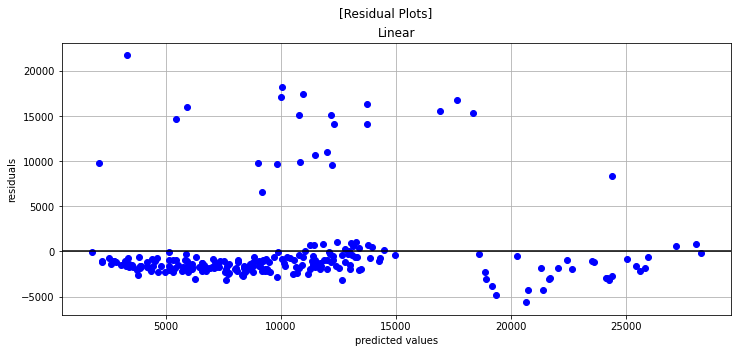

In [32]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Linear')

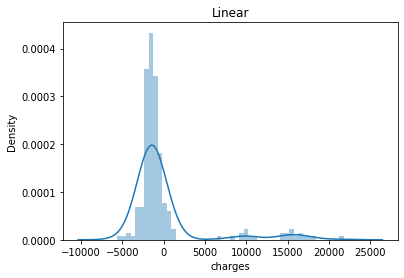

In [33]:
import seaborn as sns

residuals_linear = y_test - model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

In [34]:
import statsmodels.api as sm
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     227.4
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          1.57e-233
Time:                        17:37:45   Log-Likelihood:                -11801.
No. Observations:                1199   AIC:                         2.362e+04
Df Residuals:                    1190   BIC:                         2.367e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1600.5066    337.569  

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [38]:
vif

,VIF,features
0,1.020381,age
1,1.167918,bmi
2,1.003027,children
3,inf,sex_female
4,inf,sex_male
5,inf,smoker_no
6,inf,smoker_yes
7,inf,region_northeast
8,inf,region_northwest
9,inf,region_southeast


In [39]:
x_new = x.drop(['sex_female','smoker_no'], axis=1)
x_new.shape

(1199, 9)

In [40]:
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns
vif

,VIF,features
0,1.020381,age
1,1.167918,bmi
2,1.003027,children
3,1.002041,sex_male
4,1.076888,smoker_yes
5,9.359875,region_northeast
6,9.682280,region_northwest
7,11.469085,region_southeast
8,9.780944,region_southwest


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y,test_size = 0.2,random_state=5) 

In [42]:
model1 = LinearRegression().fit(x_train,y_train)

In [43]:
print("R2 is:",model1.score(x_test,y_test))

R2 is: 0.6253302705767261


In [44]:
print("Adjusted R-Square:",1 - (1-model1.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Adjusted R-Square: 0.610669281164511


In [45]:
getdummy.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [46]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [47]:
x = getdummy.drop('charges',axis=1)  
y = getdummy.charges  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=5)

In [48]:
ridgeReg = Ridge(alpha=0.0005, normalize=True)

ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
score = ridgeReg.score(x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [49]:
score

0.6253073541596791

In [50]:
ridgeReg.coef_

array([  233.72587607,    79.63837336,   392.65467965,   249.07846191,
        -249.0784619 , -7356.5661994 ,  7356.56619939,   874.79301656,
         380.262875  ,  -682.82442221,  -590.79663124])

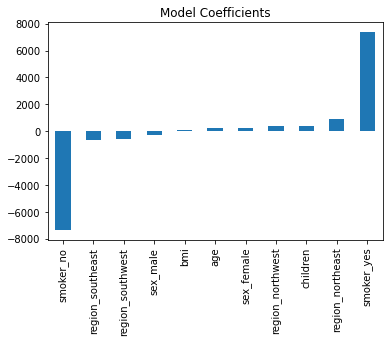

In [51]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [52]:
lassoReg = Lasso(alpha=0.03)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
lassoReg.score(x_test,y_test)

0.6253334262146293

In [53]:
lassoReg.coef_

array([   233.84520326,     79.70460968,    392.79776007,    498.09139167,
           -0.        , -14717.20745549,      0.        ,   1331.79409733,
          837.10849815,   -226.27765485,   -134.21891529])

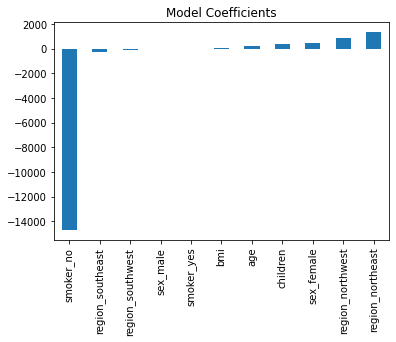

In [54]:
predictors = x_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')